In [2]:
import torch
#from torch import nn
import torch.nn as nn # <-- preferred way over the above

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_circles

pytorch is focusing on deep learning, while scikit learn is focusing on lot of things around marchine learning

In [3]:
# make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [5]:
X[:, 0][:5]

array([ 0.75424625, -0.75615888, -0.81539193, -0.39373073,  0.44220765])

In [6]:
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
len(X[:,0]), len(X[:,1])

(1000, 1000)

In [8]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
x = X[:,0]
type(x)

numpy.ndarray

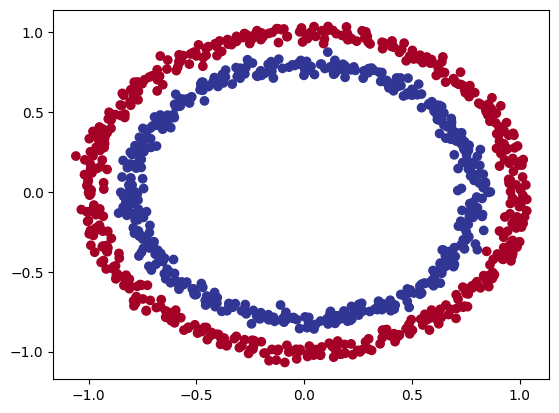

In [11]:
# cm: color map
# c=y: color with label: y contains either 0 or 1 where y is defined in the above cell
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### check inout and output shapes

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
print(f"values for one sample of X: {X[0]} and y sample {y[0]}")

values for one sample of X: [0.75424625 0.23148074] and y sample 1


In [14]:
# turn data into tensor
X = torch.from_numpy(X).type(torch.float)

In [15]:
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5]


tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [17]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [18]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [19]:
# split data into traing and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [21]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### building a model

In [22]:
# make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [23]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [24]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # create 2 nn.Linear
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5) # <- generally multiple of 8 because of computing efficiency
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
        

    def forward(self, x) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))

In [25]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.4715,  0.4638],
        [-0.3063,  0.4380],
        [ 0.4663,  0.2007],
        [ 0.3776, -0.6423],
        [-0.0385, -0.4300]], requires_grad=True)

In [27]:
for name, param in model_0.named_parameters():
    print(name)
    print(param, '\n')

layer_1.weight
Parameter containing:
tensor([[ 0.4715,  0.4638],
        [-0.3063,  0.4380],
        [ 0.4663,  0.2007],
        [ 0.3776, -0.6423],
        [-0.0385, -0.4300]], requires_grad=True) 

layer_1.bias
Parameter containing:
tensor([ 0.1727, -0.1306, -0.4936,  0.2409, -0.6203], requires_grad=True) 

layer_2.weight
Parameter containing:
tensor([[ 0.1733,  0.0736,  0.1918, -0.4416,  0.1838]], requires_grad=True) 

layer_2.bias
Parameter containing:
tensor([-0.3921], requires_grad=True) 



In [28]:
# or
# model_0 = nn.Sequential(
#     nn.Linear(in_features=1, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)
# model_0

In [29]:
# or


# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()        
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=1, out_features=5),
#             nn.Linear(in_features=5, out_features=1)
#         )

#     def forward(self, X) -> torch.Tensor:
#         return self.two_linear_layers(X)

    

In [30]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4715,  0.4638],
                      [-0.3063,  0.4380],
                      [ 0.4663,  0.2007],
                      [ 0.3776, -0.6423],
                      [-0.0385, -0.4300]])),
             ('layer_1.bias',
              tensor([ 0.1727, -0.1306, -0.4936,  0.2409, -0.6203])),
             ('layer_2.weight',
              tensor([[ 0.1733,  0.0736,  0.1918, -0.4416,  0.1838]])),
             ('layer_2.bias', tensor([-0.3921]))])

In [31]:
# make a predication with untrained model:
with torch.inference_mode():
  untrained_preds = model_0(X_test)
len(untrained_preds), untrained_preds.shape, len(X_test), X_test.shape
untrained_preds[:10]

tensor([[-0.4346],
        [-0.3458],
        [-0.7811],
        [-0.3359],
        [-0.9616],
        [-0.9059],
        [-0.5129],
        [-0.6445],
        [-0.7729],
        [-0.3418]])

In [32]:
# setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # sigmoid function is built in with numerical stability; sigmoid followed by BCELoss achieves similar outcomess

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=1e-1)


In [33]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return 100 * (correct/len(y_true))


In [34]:
# train model
# first see the y_logits

# logits: output not being passed to activation function yet; our model outputs are going to be raw logits
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4346],
        [-0.3458],
        [-0.7811],
        [-0.3359],
        [-0.9616]])

In [35]:
# use sigmoid activation function on our model logits to turn them into predication probabiltiy

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3930],
        [0.4144],
        [0.3141],
        [0.4168],
        [0.2766]])

In [36]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [37]:
# combine the above a few steps:
# logits -> pred probs -> pred labels via
# inference -> sigmoid -> round
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[0:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [38]:
#check if it is the same as we got earlier:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


In [39]:
# now we're ready to build a training and test loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
for epoch in range(epochs):
    model_0.train()

    #forward
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    #calculate loss and optionally caculat accuracy
    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_preds)
    
    ###
    # if we use BCELoss as loss function, need to calculate the probablity by ourself, as follows:
    #loss = torch.nn.BCELoss(torch.sigmoid(y_logits), y_train)

    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

    ## testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        
        test_loss = loss_fn(test_logits, y_test)

        test_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)


    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.75594, Acc: 50.00% | Test Loss: 0.75501 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.71950, Acc: 50.00% | Test Loss: 0.72315 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.70533, Acc: 42.50% | Test Loss: 0.71071 | Test Acc: 40.00%
Epoch: 30 | Loss: 0.69944, Acc: 46.50% | Test Loss: 0.70538 | Test Acc: 47.50%
Epoch: 40 | Loss: 0.69679, Acc: 49.00% | Test Loss: 0.70280 | Test Acc: 46.50%
Epoch: 50 | Loss: 0.69549, Acc: 50.00% | Test Loss: 0.70134 | Test Acc: 45.00%
Epoch: 60 | Loss: 0.69478, Acc: 49.75% | Test Loss: 0.70036 | Test Acc: 46.50%
Epoch: 70 | Loss: 0.69434, Acc: 50.12% | Test Loss: 0.69962 | Test Acc: 47.50%
Epoch: 80 | Loss: 0.69404, Acc: 50.50% | Test Loss: 0.69902 | Test Acc: 46.00%
Epoch: 90 | Loss: 0.69382, Acc: 50.75% | Test Loss: 0.69851 | Test Acc: 45.50%


In [40]:
# investigate why our model isn't learning anything
#. make a predication and make them visual
import requests
from pathlib import Path

#download a help function
if Path('helper_functions.py').is_file():
    print("helper_functions.py file exists")
else:
    print("dowloading helper_function.py")
    # https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
    # need the raw format:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

ModuleNotFoundError: No module named 'requests'

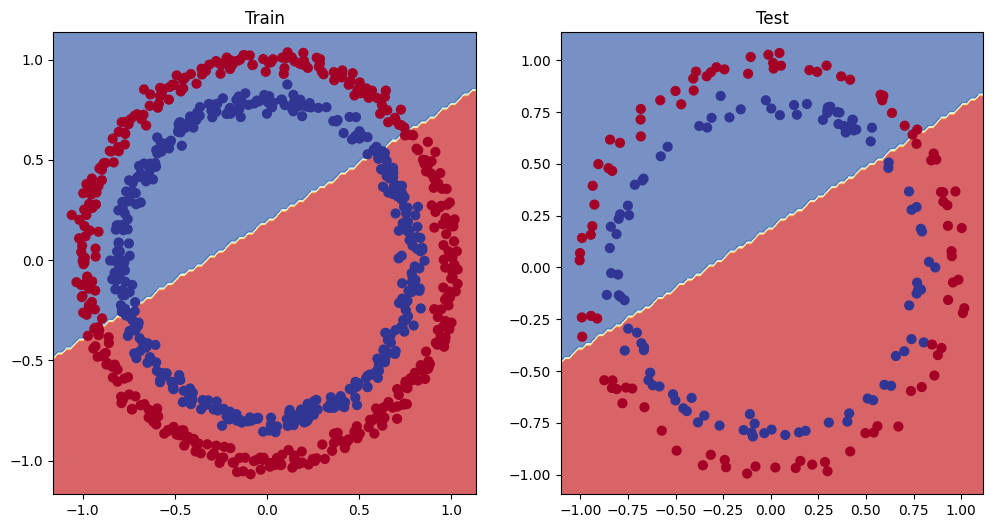

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Change one at a time to see the improvement:

### improve a model from model's prospective:

1. add more layers - gives the model mor chances to learn about the patterns in the data: from 2 layers to 10 layer for example.
2. changing the activation functions
3. changing the learning rate (exploding/vanishing)

### quality data and amount:
1. balanced...

### hyperparemeters
1. adding more hidden units 5 -> 10
2. increase epochs 100 -> 1000
3. 
